In [4]:
%matplotlib inline
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

ImportError: No module named matplotlib

In [2]:
## read in the table and print them 
oldtb = Table.read('NearbyGalaxiese_formatted_rell.dat', format='ascii')
oldtb

NameError: name 'Table' is not defined

In [8]:
## this is to skip some QSOs:
qsonumber = len(oldtb)  # the total number of QSOs
newtb = oldtb.copy() # going to make some changes to the old/original table, 
                     # but also keep the original one to keep tracking things

## skip line, prefer to just have mass scaled plot, but fluffy stream and  
skip_qsos = ['*CanisMajor', 'LMC', 'SMC']
for iqso in skip_qsos:
    ind = newtb['GalaxyName'] == iqso ## ind is an array with True or False value 
                                         ## True is where GalaxyName matches skipped qso name
    temp = newtb[np.logical_not(ind)] 
    newtb = temp

In [9]:
## now this table should not have the skipped galaxies 
newtb

GalaxyName,RA_h,RA_m,RA_s,Dec_d,Dec_m,Dec_s,Dist,sig1,sig2,vh(km/s),MHI,r_ell,ell_surf_dist
str16,int64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
SagittariusdSph,18,55,19.5,-30,32,43,17.1,0.15,0.15,140.0,0.0,527.702778591,-234.311089704
*TucanaIII,23,56,36.0,-59,36,0,17.01,0.16,0.16,999.9,0.0,525.709158084,-230.739499566
*DracoII,15,52,47.6,64,33,55,16.9,0.3,0.3,999.9,0.0,512.06877796,-236.35353465
Segue(I),10,7,4.0,16,4,55,16.8,0.2,0.2,208.5,0.0,530.961758822,-225.278625684
*Reticulum2,3,35,42.1,-54,2,57,17.4,0.2,0.2,999.9,0.0,530.196226133,-222.375890658
*CetusII,1,17,52.8,-17,25,12,17.38,0.19,0.19,999.9,0.0,506.459098004,-235.751780731
*TriangulumII,2,13,17.4,36,10,42,17.4,0.1,0.1,999.9,0.0,490.867418822,-249.483540885
UrsaMajorII,8,51,30.0,63,7,48,17.5,0.3,0.3,-116.5,0.0,511.944484011,-227.392737439
BootesII,13,58,0.0,12,51,0,18.1,0.06,0.06,-117.0,0.0,547.723417021,-213.049015179


In [23]:
## select positive and negative ell_surf_dist from the new

ind_neg = np.any([newtb['ell_surf_dist']<=0.0], axis=0)
ind_pos = np.any([newtb['ell_surf_dist']>0.0], axis=0)

## dist
absellneg = np.fabs(newtb['ell_surf_dist'][ind_neg])
logabsellneg = np.log10(absellneg)
logellpos = np.log10(newtb['ell_surf_dist'][ind_pos])

## mass 
MHIneg = newtb['MHI'][ind_neg]*1e6 + 1  ## note this '+1' is not correct, but is negligible 
logMHIneg = np.log10(MHIneg)            ## the +1 is to avoid log error on zero MHI values 

MHIpos = newtb['MHI'][ind_pos]*1e6 + 1
logMHIpos = np.log10(MHIpos)

## there is an warning because we take the log of all 0 values 
#print(logabsellneg)
print MHIpos.size

44


In [6]:
objname = 'LGS3'
for i, iname in enumerate(newtb['GalaxyName']):
    if iname == objname:
           find_it = True
           break 
       else: 
           find_it = False

   if find_it == True:
       dist = float(newtb[‘column looking for'][i])
       return dist

dist(objname)


IndentationError: unindent does not match any outer indentation level (<ipython-input-6-801a208cc635>, line 6)

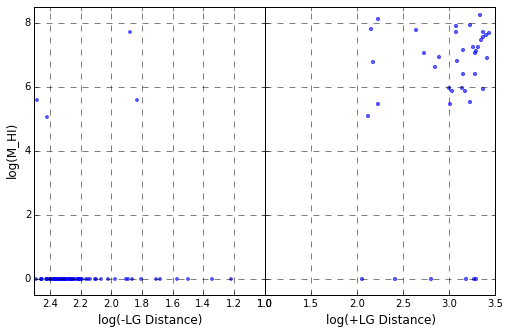

In [17]:
## make two plots for pos and neg separately, and piece them together
## note that sometimes x/y step sizes may not match well 
fig = plt.figure(figsize=(8, 5))
axneg = fig.add_axes([0.1, 0.1, 0.4, 0.8])
axneg.scatter(logabsellneg, logMHIneg, s=8, marker='o', color='b', alpha=0.6) ## alpha is for transpancy
axneg.set_xlim(2.5, 1.0)
axneg.set_ylabel('log(M_HI)', fontsize=12)

axpos = fig.add_axes([0.5, 0.1, 0.4, 0.8])
axpos.scatter(logellpos, logMHIpos, s=10, marker='o', color='b', alpha=0.6)
axpos.set_xlim(1.0, 3.5)
axpos.set_yticklabels([])

for ax in [axneg]:  ## these setup are the same for the neg and pos, so do them together
    ax.set_ylim(-0.5, 8.5)
    ax.grid('on', linestyle='--')
    ax.set_xlabel('log(-LG Distance)', fontsize=12)
    
for ax in [axpos]:  ## these setup are the same for the neg and pos, so do them together
    ax.set_ylim(-0.5, 8.5)
    ax.grid('on', linestyle='--')
    ax.set_xlabel('log(+LG Distance)', fontsize=12)
    
plt.savefig('LGsurf.pdf')